# <h1><center>Workshop 4</center></h1>
## Objectives

- To appreciate the role of buffer analysis under the wider realm of geospatial analysis. 
- To apply buffer analysis for planning the route of an avaiation company
- To learn the usage of datasets available with GeoPandas



## Prior to starting this workshop you must import some key libraries 

In [1]:
# Import these libraries: Geopandas, Pandas and Matplotlip.pyplot
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Buffer analysis basics


<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Read the Swimming Pool Dataset (swimming_pools.shp) in the Workshop4Data folder
    
* <span style='font-family:Georgia'> Display the first five rows of the dataset.
 
</div>

In [2]:
shp = 'week4/swimming_pools.shp'
pools = gpd.read_file(shp)
pools.head()

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
0,1,Fox Chase Pool,Fox Chase Recreation Center,7901 RIDGEWAY ST,19111,OUTDOOR,ACTIVE,NaN,NaN,Finder; Previous GIS Data,POINT (-75.08232 40.07367)
1,2,Mitchell Pool,Thomas Mitchell Memorial Playground,3600 WHITEHALL LN,19114,OUTDOOR,ACTIVE,NaN,2012-01-01,Capital 2019; Finder,POINT (-74.99143 40.06830)
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,NaN,NaN,Finder; Previous GIS Data,POINT (-75.07590 40.05629)
3,4,Jacobs Pool,George Jacobs Playground,4500 LINDEN AVE,19136,OUTDOOR,ACTIVE,NaN,NaN,Aquatics 2019; Finder,POINT (-75.00284 40.05266)
4,5,Morris Estates Pool,Morris Estate Cultural Center,1610 CHELTEN AVE,19141,OUTDOOR,ACTIVE,Emergency access is from Chelten around the bu...,NaN,Finder; Administration,POINT (-75.14641 40.04992)


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Plot the swimming pools data with Geopandas. 
 
</div>

<Axes: >

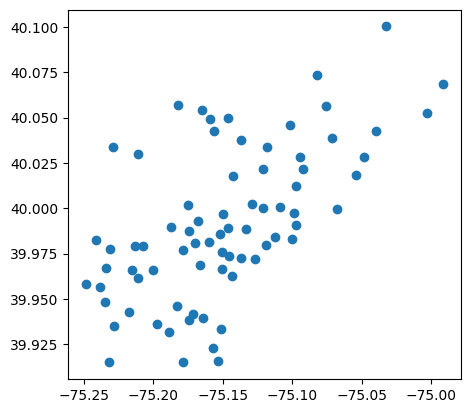

In [3]:
pools.plot()

<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Find the the swimming pool with the following name "Fox Chase Pool". Plot Fox Chase Pool. 
 
</div>

In [5]:
fox_pool = pools[pools["NAME"] == "Fox Chase Pool"]
fox_pool.head()

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
0,1,Fox Chase Pool,Fox Chase Recreation Center,7901 RIDGEWAY ST,19111,OUTDOOR,ACTIVE,NaN,NaN,Finder; Previous GIS Data,POINT (-75.08232 40.07367)


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Create the buffer around the Fox Chase Pool with a distance of your choice (e.g. 10 units). 
 
</div>

In [36]:
fox_pool_buffered = fox_pool.geometry.buffer(2)

/var/folders/3x/5jj60pms5ml09xsn32f0c4yr0000gn/T/ipykernel_21368/3919777889.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  fox_pool_buffered = fox_pool.geometry.buffer(2)



<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Plot the buffered point around the Fox Chase Pool  . 
 
</div>

<Axes: >

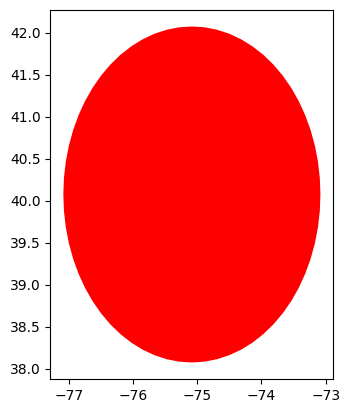

In [37]:
fox_pool_buffered.plot(color='red')


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Which number did you choose for the distance?. 
 
</div>

<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Is it meters, Kilometers, foot or something else? How do you know it? (Hint: Check the CRS)
 
</div>

In [38]:
# Which number did you choose for the distance: 2
fox_pool_centroid.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich


<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Can you find out a CRS that uses Meters  as Unit of measurement? (Hint: search in https://epsg.io/)
    
* <span style='font-family:Georgia'> If you manage to find out a CRS that has meter as unit of measure, set the CRS of the swimming pool to the meter based CRS. A meter based units is being set here. You can use to_crs() 
 
</div>

In [39]:
fox_pool_meter = fox_pool.to_crs(3857)
fox_pool_meter

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
0,1,Fox Chase Pool,Fox Chase Recreation Center,7901 RIDGEWAY ST,19111,OUTDOOR,ACTIVE,NaN,NaN,Finder; Previous GIS Data,POINT (-8358125.204 4876654.079)




<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Check if the CRS is changed and meter is the unit of measurement (HINT: .crs)
 
</div>

In [40]:
fox_pool_meter.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Now, buffer a distance of your choice (in meters) on Fox Chase swimming pool. Plot the buffered point.
 
</div>



In [41]:
fox_pool_meter_buffered = fox_pool_meter.geometry.buffer(10)

<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Plot the buffered point.
 
</div>

<Axes: >

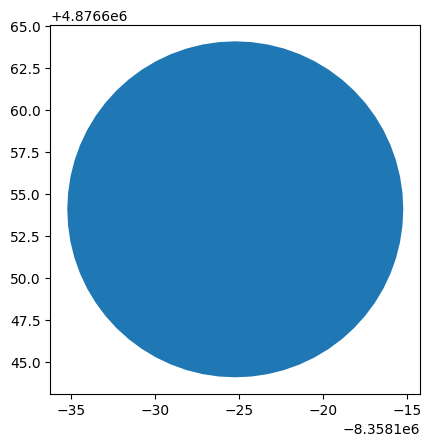

In [42]:
fox_pool_meter_buffered.plot()

# Buffer analysis - real world application


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> An avaiation company, ABC is planning to expand its flight services from Doha. The constraint however is that all the new flight services must be within 1000 kilometre range. Using your Geospatial Analysis skill, can you please tell whether a new flight service to Abu Dhabi from Doha is feasible?
 
</div>

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> HINT: Please note that Doha and Abu Dhabi are capital cities. Can you use a dataset already available with GeoPandas library (gpd.datasets.available) to locate the geometry points for these cities.
 
</div>

In [43]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [52]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


    name                   geometry
21  Doha  POINT (51.53297 25.28656)


<Axes: >

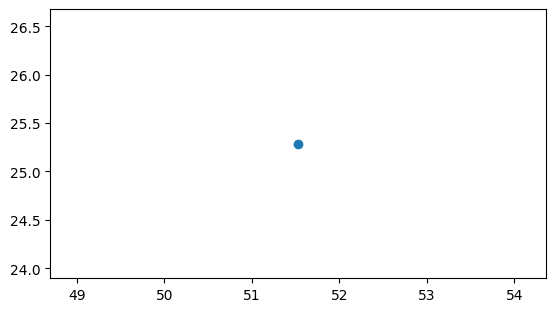

In [58]:
doha = world[world["name"] == "Doha"]
print(doha.head())
doha.plot()

         name                   geometry
48  Abu Dhabi  POINT (54.36659 24.46668)


<Axes: >

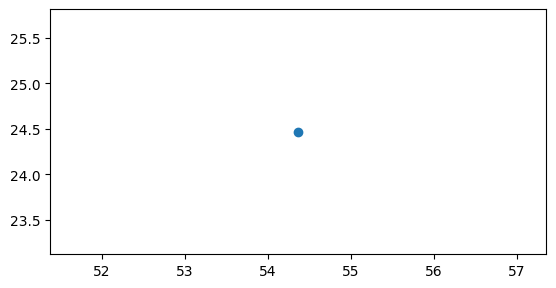

In [59]:
abu = world[world["name"] == "Abu Dhabi"]
print(abu.head())
abu.plot()

In [60]:
world.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
# Convert from degree to metre
world_meter = world.to_crs(3857)
world_meter.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
abu_m = world_meter[world_meter["name"] == "Abu Dhabi"]
doha_m = world_meter[world_meter["name"] == "Doha"]

<Axes: >

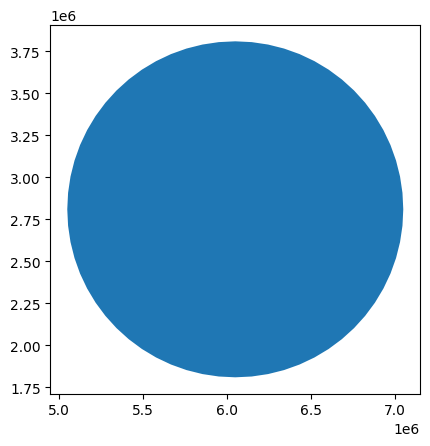

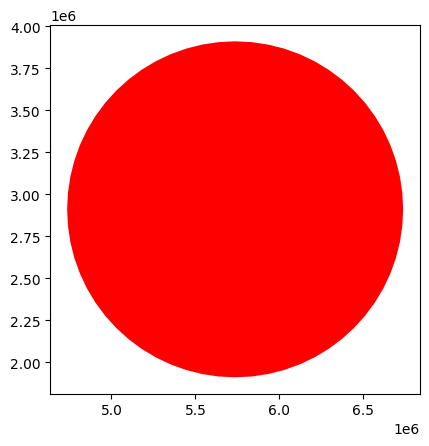

In [65]:
abu_m.buffer(1000000).plot()
doha_m.buffer(1000000).plot(color='red')

<Axes: >

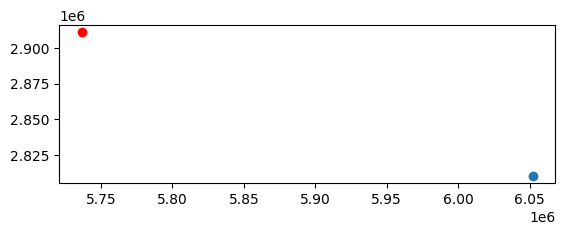

In [66]:
ax = abu_m.plot()
doha_m.plot(ax=ax, color='red')

<Axes: >

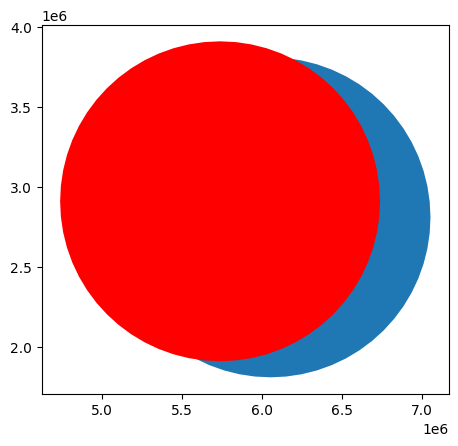

In [67]:
ax = abu_m.buffer(1000000).plot()
doha_m.buffer(1000000).plot(ax=ax, color='red')

# Workshop deliverable

You are required to submit a copy of this solved Jupyter notebook through the Workshop 4 Submission Point on the Moodle. Since this is a teamwork so your work will most likely be identical to your team members. Despite that each team member should submit independently.